### Contents

01 Import libraries and dataset

02 Visualisations

03 Sample

04 Expenditure over the day

05 Exploratory analysis of customer demographics

06 Export visualisations

### 01 Import libraries and dataset

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Create path to Prepared Data folder

path = r"C:\Users\cathe\OneDrive\Data Analysis\2 4 Instacart Basket Analysis\02 Data\Prepared Data"

In [8]:
# Import data

df = pd.read_pickle(os.path.join(path, 'orders_products_all.pkl'))

In [10]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [36]:
# Some columns hidden in output above.  List all columns

df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'av_item_spend', 'spend_level', 'median_days_since_prior_order',
       'order_frequency', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

### 02 Visualisations

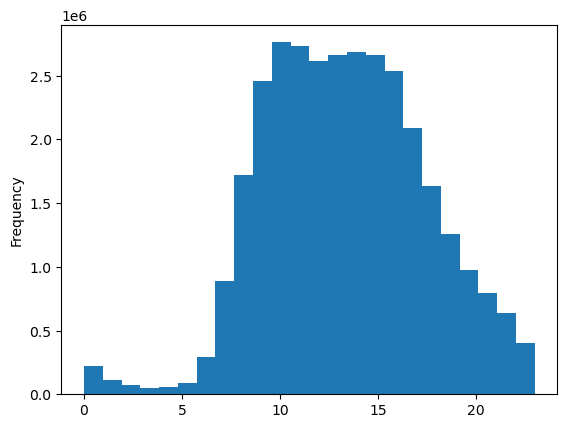

In [29]:
# Histogram of hours of the day

hist = df['order_hour_of_day'].plot.hist(bins = 24)

The quietest time for orders is midnight - 7am.  The busiest time is 9am - 4pm, with 10am - 12pm being the peak.

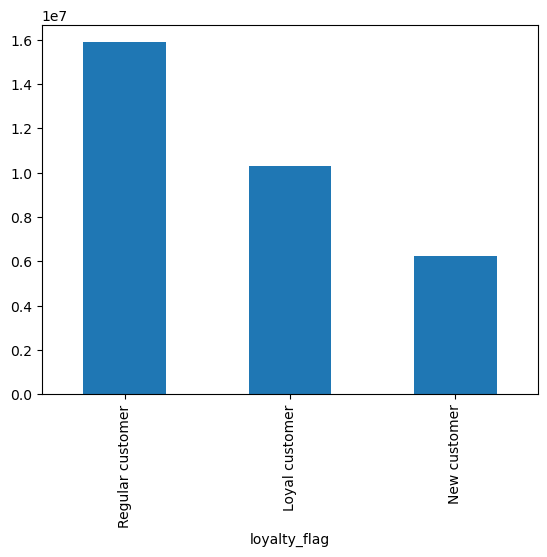

In [46]:
# Bar chart of loyalty flag

bar = df['loyalty_flag'].value_counts().plot.bar()

Loyal customers order fewer items in total than regular customers.  New customers order fewer items than all other customers.

### 03 Sample

In [52]:
np.random.seed(1)

In [54]:
dev = np.random.rand(len(df)) <= 0.7

In [56]:
# Create 70% sample of dataframe

df_70 = df[dev]

In [57]:
# Create 30% sample of dataframe

df_30 = df[~dev]

In [62]:
# Check relative lengths of dataframes

len(df) == len(df_30) + len(df_70)

True

### 04 Expenditure over the day

In [66]:
# Create dataframe only containing required columns

df_p = df_30[['order_hour_of_day', 'prices']]

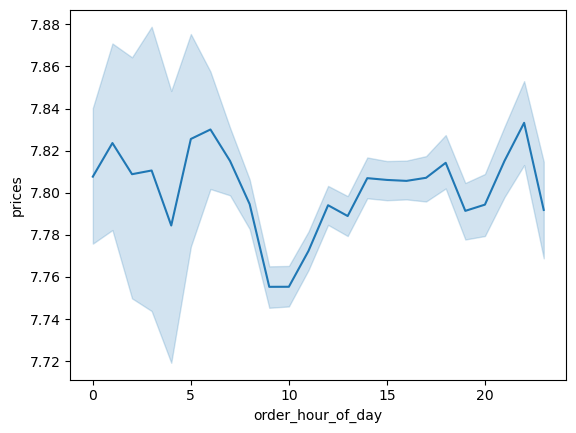

In [68]:
# Create line chart prices against hour of day

line2 = sns.lineplot(data = df_p, x = 'order_hour_of_day', y = 'prices')

In [69]:
# Two-column dataframe for prices against day of week

df_w = df_30[['order_day_of_week', 'prices']]

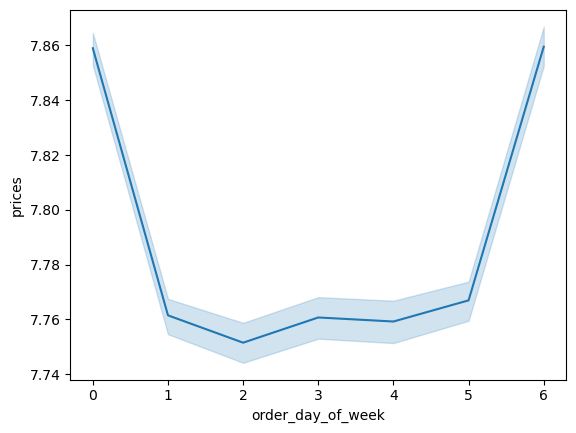

In [72]:
# Create line chart prices against day of week

line = sns.lineplot(data = df_w, x = 'order_day_of_week', y = 'prices')

### 05 Exploratory analysis of customer demographics

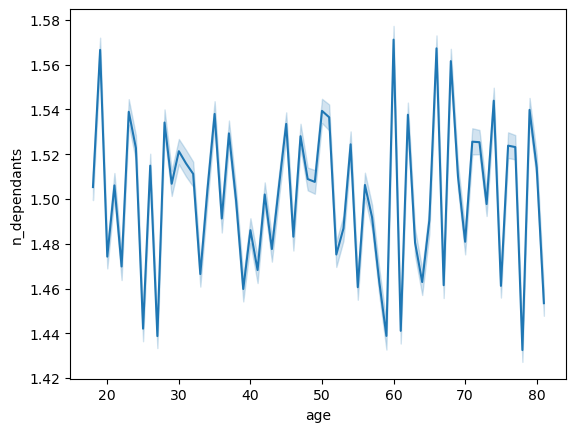

In [75]:
# Age and number of dependents

line3 = sns.lineplot(data = df_30, x = 'age', y = 'n_dependants')

There is no obvious pattern between age and number of dependents 

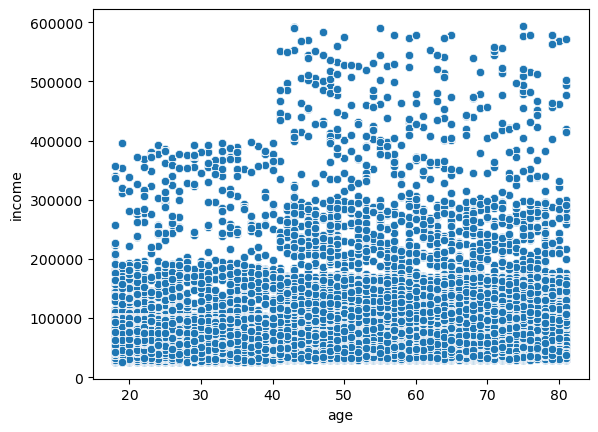

In [77]:
# Age and spending power

scatter = sns.scatterplot(x = 'age', y = 'income', data = df_30)

There is a marked divide between the under 40s and the over 40s.  Nobody under the age of 40 earns more than `$400,000` and most earn under `$200,000`.  Over-40s earn up to `$600,000` and there are more people earning between `$200,000` and `$300,000` than in the under-40 group.

### 06 Export visualisations

In [85]:
# Create path to Visualisations folder

path2 = r"C:\Users\cathe\OneDrive\Data Analysis\2 4 Instacart Basket Analysis\04 Analysis\Visualisations"

In [87]:
hist.figure.savefig(os.path.join(path2, 'hist_hour_day.png'))

In [89]:
bar.figure.savefig(os.path.join(path2, 'bar_loyalty.png'))

In [91]:
line.figure.savefig(os.path.join(path2, 'line_prices_week.png'))

In [93]:
line2.figure.savefig(os.path.join(path2, 'line_prices_day.png'))

In [95]:
line3.figure.savefig(os.path.join(path2, 'line_age_dependents.png'))

In [97]:
scatter.figure.savefig(os.path.join(path2, 'scatter_age_income.png'))